# 차원 축소 (Dimensionality Reduction)

## 1. 개요

### 배경
현실 데이터는 수십, 수백 개의 특성을 가진 **고차원 데이터**인 경우가 많습니다.  
차원이 높아지면 → 시각화가 어려워지고, 계산량이 폭발하며, 모델이 과적합되는 문제가 발생합니다.  

👉 **차원 축소(Dimensionality Reduction)** 는  
- 데이터의 중요한 정보를 유지하면서,  
- 불필요하거나 중복된 차원을 줄여  
- 시각화, 처리 효율성, 모델 성능 향상에 기여합니다.

## 학습 목표
이 토픽을 수강한 뒤, 수강생은 다음을 할 수 있어야 합니다:

- 차원 축소의 필요성과 이점을 설명할 수 있다.  
- PCA와 LDA의 원리를 이해하고 실제 데이터에 적용할 수 있다.  
- 차원 축소를 통해 데이터 시각화 및 모델 성능 평가를 수행할 수 있다.

## 주요 학습 개념

- **차원 축소란?**
  - 차원 축소의 정의와 필요성  
  - 차원 축소의 이점 (시각화, 처리 효율성, 성능 향상 등)  

- **PCA (Principal Component Analysis)**  
  - PCA의 기본 개념  
  - 공분산 행렬과 고유벡터  
  - 주성분 선택 원리  
  - scikit-learn을 사용한 PCA 구현  

- **LDA (Linear Discriminant Analysis)**  
  - LDA의 기본 개념  
  - 클래스 분리 기준 (between-class variance / within-class variance)  
  - scikit-learn을 사용한 LDA 구현  

- **차원 축소 활용**  
  - 차원 축소를 통한 데이터 시각화 (2D, 3D 표현)  
  - 차원 축소 후 모델 성능 비교  
  - 차원 축소 vs 피처 선택 차이점  

## 0. 들어가기

데이터가 가진 **차원(dimension)** 이란, 하나의 데이터가 가지고 있는 **특성(feature)** 의 개수를 의미합니다.  
예:  
- 키, 몸무게, 나이 → 3차원 데이터  
- 픽셀 784개로 이루어진 MNIST 숫자 이미지 → 784차원 데이터

👉 차원이 커질수록 나타나는 문제:  
- **시각화 불가능**: 3차원 이상은 인간이 직관적으로 보기 어렵다.  
- **계산량 폭발**: 차원이 늘어나면 거리 계산, 행렬 연산이 급격히 늘어난다.  
- **차원의 저주(Curse of Dimensionality)**: 차원이 커질수록 데이터가 희소해져 모델 학습이 어려워진다.  

  <img src="image/dimensionality.png">  

이미지 출처 : https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/#google_vignette

따라서 차원을 줄이는 기술, 즉 **차원 축소(Dimensionality Reduction)** 가 필요하다.  

## 1. 차원 축소 기본 개념

### 1.1 차원 축소란?
- 원래 데이터의 중요한 정보를 유지하면서 **특성의 개수를 줄이는 과정**  
- 불필요한 변수 제거, 데이터 압축, 시각화에 활용  

<img src="image/Dimensionality_Reduction.jpg">  

이미지 출처 : https://blog.roboflow.com/what-is-dimensionality-reduction/

### 1.2 차원 축소의 이점
1. **시각화 용이**  
   - 2D, 3D로 축소하여 데이터 패턴을 그림으로 확인 가능  
2. **처리 효율성 향상**  
   - 계산량이 줄어 모델 훈련 속도 증가  
3. **잡음 제거**  
   - 중요하지 않은 특성을 줄여 모델 성능 향상  
4. **과적합 방지**  
   - 복잡성을 줄여 일반화 성능 향상

### 1.3 차원 축소 방법
- **PCA (주성분 분석)**: 분산이 가장 큰 방향을 찾아 차원 축소  
- **LDA (선형 판별 분석)**: 클래스 간 분리를 최대화하는 방향으로 축소  
- (심화) t-SNE, UMAP: 비선형 데이c터 시각화에 강력

### 1.4 간단한 예시 (Iris 데이터셋 시각화 전후)

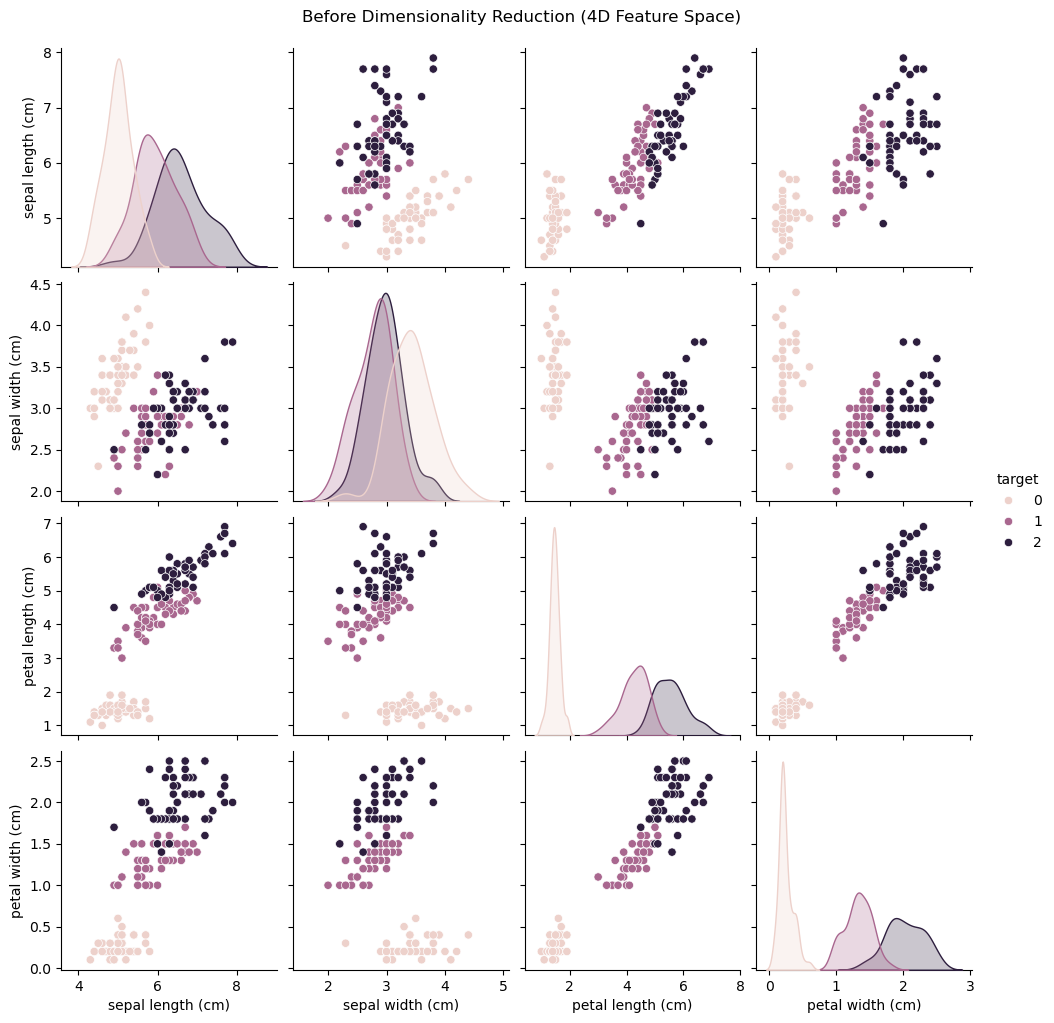

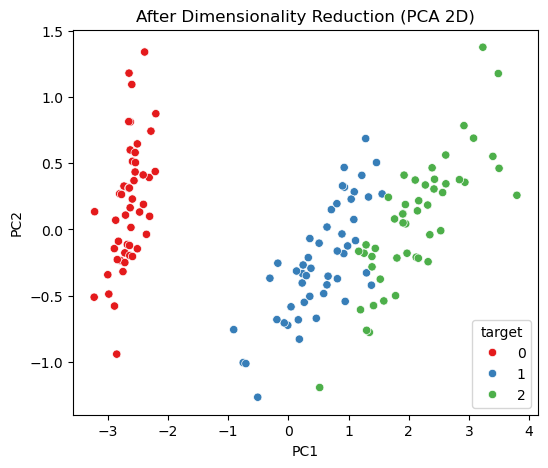

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning) # FutureWarning 숨기기


# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

# ---------------------
# 전(before): 4D → pairplot
# ---------------------
sns.pairplot(df, hue="target", vars=iris.feature_names)
plt.suptitle("Before Dimensionality Reduction (4D Feature Space)", y=1.02)
plt.show()

# ---------------------
# 후(after): PCA → 2D
# ---------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)

df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["target"] = iris.target

plt.figure(figsize=(6,5))
sns.scatterplot(x="PC1", y="PC2", hue="target", data=df_pca, palette="Set1")
plt.title("After Dimensionality Reduction (PCA 2D)")
plt.show()


### ✅ 체크포인트
- 차원 = 데이터의 특성 개수  
- 차원이 높으면 계산량과 복잡성이 증가 → 차원의 저주 발생  
- 차원 축소는 시각화, 효율성, 성능 향상에 도움을 준다  
- 대표 기법: PCA, LDA (→ 다음 장에서 학습)  

## 2. PCA (Principal Component Analysis)

### 2.1 PCA란?
- **고차원 데이터를 저차원으로 축소**하는 가장 대표적인 기법  
- 데이터의 **분산(variance)** 이 가장 큰 방향을 찾아 새로운 축(주성분, Principal Component)을 만든다  
- 이렇게 만든 축을 따라 데이터를 투영하여 차원을 줄인다  

👉 핵심 아이디어:  
"데이터를 가장 잘 설명할 수 있는 방향(축)을 찾아, 그 축만 남기고 나머지는 버리자"

### 2.2 PCA 절차 (상세 설명)

#### **1. 데이터 표준화 (평균=0, 표준편차=1)**  

PCA는 **변수의 스케일(단위)** 에 매우 민감하다.  
예를 들어, 키(cm)와 몸무게(kg)를 함께 쓰면, 단위가 큰 쪽이 분산을 지배하게 된다.  
이를 방지하기 위해 **평균을 0, 표준편차를 1**로 맞추는 과정을 거친다.

#### **2. 공분산 행렬 계산 (Covariance Matrix)**  

표준화된 데이터의 변수들 간의 관계(변동 방향과 크기)를 보기 위해 **공분산행렬**을 만든다.

공분산의 정의:

$
\text{Cov}(X, Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})
$

- Cov > 0 → 두 변수가 **같은 방향으로 변함**  
- Cov < 0 → 두 변수가 **반대 방향으로 변함**  
- Cov ≈ 0 → **거의 무관함**
#### **공분산행렬의 형태 예시**

2개의 변수 \(X_1, X_2\)에 대해:

$$
\Sigma =
\begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2)
\end{bmatrix}
$$

예를 들어:
$$
\Sigma =
\begin{bmatrix}
4 & 2 \\
2 & 3
\end{bmatrix}
$$

- **대각선 원소**는 각 변수의 **분산(Var)**  
- **비대각선 원소**는 변수 간의 **공분산(Cov)**  
- Cov가 양수 → 두 변수가 같은 방향으로 변동  
- Cov가 음수 → 반대 방향으로 변동  
- Cov가 0에 가까움 → 두 변수가 독립적

공분산이란,  
> “각 표본이 평균으로부터 얼마나 벗어나 있는지를 곱해본 뒤,  
> 그 값이 일관되게 양수인지 음수인지 확인하는 것”  
만약 +와 −가 섞여서 상쇄되면 Cov≈0 → 상관 없음.


#### **3. 공분산 행렬의 고유벡터와 고유값 계산** 
공분산행렬 $\Sigma$에 대해 **고유값 분해(Eigen Decomposition)** 를 수행한다.

$
\Sigma v = \lambda v
$

- $(v$): 고유벡터(Eigenvector) → 데이터가 가장 퍼진 방향 (새 축, 주성분)
- $(\lambda$): 고유값(Eigenvalue) → 그 방향의 분산 크기

즉, 고유값이 클수록 **데이터가 그 축을 따라 더 많이 퍼져 있다**는 의미이다.

#### 4. 고유값이 큰 순서대로 주성분 선택  
고유값이 가장 큰 벡터부터 차례로 정렬하면  
데이터의 분산(정보량)을 가장 잘 설명하는 축 순서대로 정렬된다.

예를 들어:

| 주성분 | 고유값(분산 비율) | 설명 |
|----------|--------------------|--------|
| PC1 | 3.2 (80%) | 데이터의 대부분 변동을 설명 |
| PC2 | 0.8 (20%) | 잔여 변동 설명 |

차원을 2 → 1로 줄일 경우, PC1만 사용한다.
#### 5. 원래 데이터를 주성분 축으로 변환

원래 데이터를 고유벡터(주성분 축)에 투영(projection)하여  
새로운 좌표로 표현한다.

$ Z = X W $

- X: 표준화된 원본 데이터  
- W: 선택된 주성분 벡터들  
- Z: 변환된 데이터 (차원 축소 결과)


### 2.3 PCA 시각적 직관

2차원 데이터를 예로 들어보자.  
데이터가 다음과 같이 **대각선 방향(↗)** 으로 퍼져 있다고 가정하자.

```markdown
y ↑
  |
  |         ●
  |      ●
  |   ●
  |●
  |__________________________→ x
```

이 경우, 원래의 x·y축은 데이터의 분포를 제대로 설명하지 못한다.  
데이터가 실제로 퍼진 방향(대각선 방향)을 기준으로 보면, 데이터의 **변동성(분산)** 이 훨씬 크다.

👉 따라서, PCA는 다음과 같은 판단을 내린다.

> “데이터가 실제로 퍼진 방향이 정보(분산)를 가장 많이 담고 있으니, 그 방향을 새 축으로 삼자.”


####  PCA가 하는 일
1. 데이터의 분산이 가장 큰 방향(↗)을 찾아 **새로운 축(PC1)** 으로 설정한다.  
2. PC1에 **직교하는 방향(↘)** 을 **두 번째 축(PC2)** 으로 설정한다.  
3. 데이터를 이 두 축으로 **회전(변환)** 시켜 새 좌표계로 표현한다.  
4. 정보 손실을 최소화하기 위해 **분산이 큰 축(PC1)** 만 남기고  
   나머지 축(PC2)은 **제거(차원 축소)** 한다.


####  핵심 개념 정리

- **PC1 (첫 번째 주성분)**:  
  데이터가 가장 넓게 퍼진 방향 (분산 최대, 핵심 정보 축)

- **PC2 (두 번째 주성분)**:  
  PC1에 직교하는 방향 (잔여 변동, 미세한 노이즈)

- PCA는 데이터를 이 두 축으로 다시 표현하고,  
  정보가 많은 **PC1만 남겨** 데이터의 차원을 줄인다.


> **요약**
>  
> PCA는 “공분산행렬을 고유값분해하여,  
> 데이터의 분산이 가장 큰 방향(즉, 정보가 가장 많은 방향)을 찾아  
> 그 축으로 데이터를 재표현하고,  
> 필요에 따라 저차원으로 축소하는 기법”이다.

### 2.4 Scikit-learn으로 PCA 구현

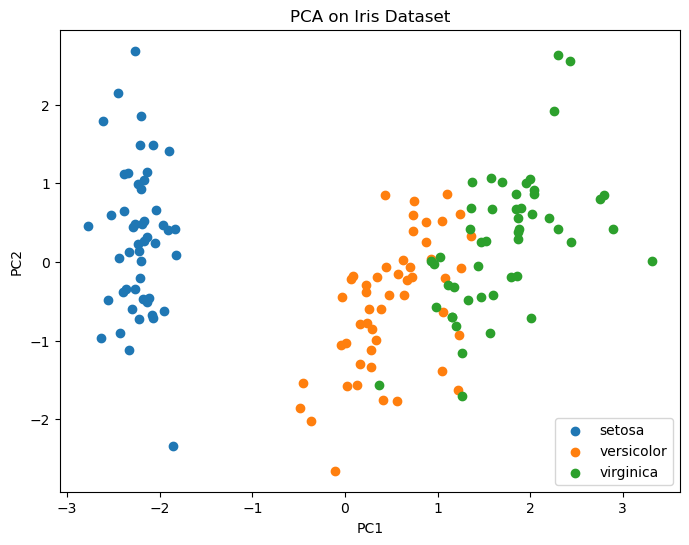

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# 1) 데이터 표준화
X_scaled = StandardScaler().fit_transform(X)

# 2) PCA (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3) DataFrame 변환
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["target"] = y

# 4) 시각화
plt.figure(figsize=(8,6))
for target in set(y):
    subset = df_pca[df_pca["target"] == target]
    plt.scatter(subset["PC1"], subset["PC2"], label=iris.target_names[target])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA on Iris Dataset")
plt.show()

### 2.5 주성분의 분산 설명력
PCA는 각 주성분이 원래 데이터의 분산을 얼마나 설명하는지도 알려준다.  

```python
print("주성분별 설명된 분산 비율:", pca.explained_variance_ratio_)
print("설명된 총 분산 비율:", sum(pca.explained_variance_ratio_))
```

👉 일반적으로, **앞 몇 개의 주성분만으로도 대부분의 정보를 유지**할 수 있다.

### ✅ 체크포인트
- PCA는 데이터의 **분산이 큰 방향**을 찾아 차원을 줄이는 기법이다.  
- 주성분은 공분산 행렬의 고유벡터로 정의된다.  
- Scikit-learn으로 손쉽게 PCA를 적용할 수 있다.  
- `explained_variance_ratio_`를 통해 정보 보존 정도를 확인할 수 있다.  


## 3. LDA (Linear Discriminant Analysis)

### 3.1 LDA란?
- **지도 학습 기반 차원 축소 기법**  
- PCA는 클래스(label)를 고려하지 않지만, **LDA는 클래스 정보를 사용**  
- 목표: 서로 다른 클래스 간 분리가 잘 되도록 새로운 축을 찾는 것  

👉 직관적으로, "클래스 간의 거리는 최대화, 클래스 내부의 분산은 최소화"  

### 3.2 LDA 절차
1. 클래스별 평균과 전체 평균 계산  
2. 클래스 간 분산(between-class scatter)과 클래스 내 분산(within-class scatter) 계산  
3. 두 분산 비율을 최대화하는 축 찾기  
4. 데이터를 그 축에 투영  

### 3.3 LDA와 PCA 차이점
- PCA: **데이터의 분산**을 가장 잘 설명하는 축 찾기 (비지도 학습)  
- LDA: **클래스 간 분리**를 가장 잘 설명하는 축 찾기 (지도 학습)  

### 3.4 Scikit-learn으로 LDA 구현

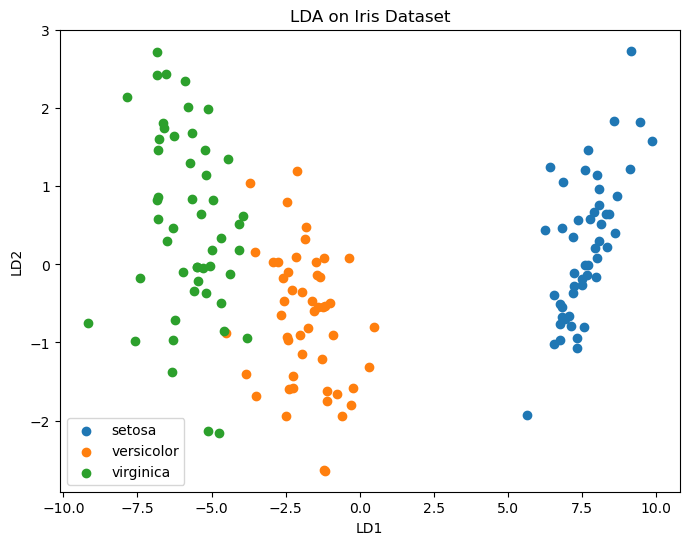

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

# LDA (2차원으로 축소)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# DataFrame 변환
df_lda = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
df_lda["target"] = y

# 시각화
plt.figure(figsize=(8,6))
for target in set(y):
    subset = df_lda[df_lda["target"] == target]
    plt.scatter(subset["LD1"], subset["LD2"], label=iris.target_names[target])
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.title("LDA on Iris Dataset")
plt.show()

### 3.5 LDA의 활용
- **시각화**: 고차원 데이터를 2D/3D로 줄여 시각적으로 클래스 분포 확인  
- **분류 성능 향상**: 차원을 줄이면서도 클래스 정보를 반영하여 더 잘 분리된 데이터 생성  
- **전처리 단계**: 분류 모델 적용 전 데이터 축소

### ✅ 체크포인트
- LDA는 클래스 정보를 활용하는 지도학습 기반 차원 축소 기법이다.  
- 클래스 간 분산은 최대화, 클래스 내 분산은 최소화한다.  
- PCA와 달리 LDA는 "클래스 분리"에 초점이 있다.  
- Scikit-learn을 통해 손쉽게 LDA를 적용하고 시각화할 수 있다.  

## 4. 차원 축소 활용

### 4.1 데이터 시각화
차원 축소의 가장 직관적인 효과는 **고차원 데이터를 2D 또는 3D로 시각화**할 수 있다는 점입니다.  

예: Iris 데이터셋을 PCA와 LDA로 축소 후 시각화

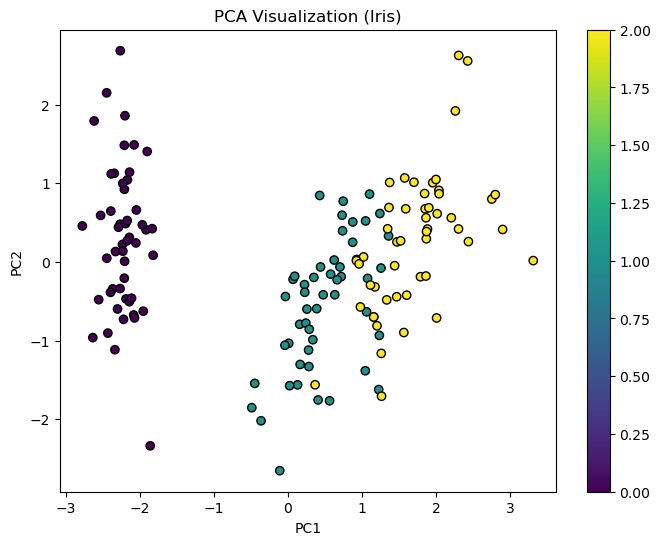

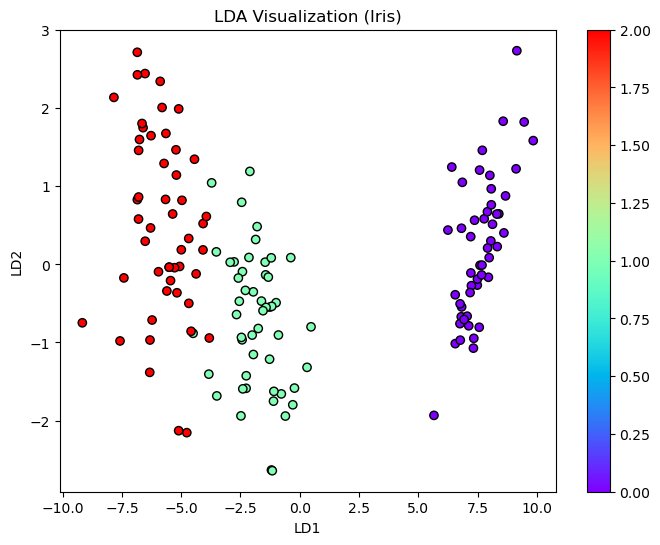

In [4]:
# 이미 PCA, LDA로 변환된 데이터 (X_pca, X_lda)
import matplotlib.pyplot as plt

# PCA 결과 시각화
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization (Iris)")
plt.colorbar()
plt.show()

# LDA 결과 시각화
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap="rainbow", edgecolor="k")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Visualization (Iris)")
plt.colorbar()
plt.show()

👉 결과:  
- PCA는 데이터의 분산을 최대한 보존 → 전체 구조 파악  
- LDA는 클래스 분리를 최적화 → 그룹이 더 명확히 구분

### 4.2 모델 성능 비교
차원 축소 후 **모델을 학습**하여 성능 차이를 비교할 수 있습니다.  

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할 (원본 데이터 vs PCA 변환 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 원본 데이터
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("원본 데이터 정확도:", accuracy_score(y_test, y_pred))

# PCA 데이터
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
lr.fit(X_pca_train, y_train)
y_pred_pca = lr.predict(X_pca_test)
print("PCA 데이터 정확도:", accuracy_score(y_test, y_pred_pca))

# LDA 데이터
X_lda_train, X_lda_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
lr.fit(X_lda_train, y_train)
y_pred_lda = lr.predict(X_lda_test)
print("LDA 데이터 정확도:", accuracy_score(y_test, y_pred_lda))

원본 데이터 정확도: 1.0
PCA 데이터 정확도: 0.9
LDA 데이터 정확도: 1.0


👉 보통:  
- PCA → 데이터 압축 후에도 성능 유지 또는 향상 가능  
- LDA → 클래스 분리도를 높여 분류 성능 개선 

### 4.3 피처 선택 vs 차원 축소
- **피처 선택 (Feature Selection)**  
  - 원래의 변수 중 중요한 것만 고름  
  - 해석이 쉽다 (예: “꽃받침 길이와 꽃잎 폭이 중요하다”)  

- **차원 축소 (Dimensionality Reduction)**  
  - 원래의 변수를 조합해 새로운 변수(주성분, 판별축)를 생성  
  - 해석은 어렵지만 더 효율적일 수 있다  

👉 즉, 피처 선택은 "원래 특성 중 일부만 고르기", 차원 축소는 "새로운 특성 만들기"

### ✅ 체크포인트
- 차원 축소는 데이터 시각화, 계산 효율, 성능 향상에 유용하다.  
- PCA는 분산 보존, LDA는 클래스 분리에 초점.  
- 차원 축소 후에도 모델 성능을 반드시 다시 평가해야 한다.  
- 피처 선택과 차원 축소는 다른 접근 방식이므로 구분해야 한다.

### 차원 축소 – 실습 문제

### 문제 1. PCA 변환
Iris 데이터셋을 불러와서,  
`n_components=2`인 PCA를 적용한 뒤 2차원 산점도로 시각화하세요.  

<details>
<summary>정답 보기</summary>

```python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# 표준화
X_scaled = StandardScaler().fit_transform(X)

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris")
plt.show()
```
</details>



In [6]:
# 여기에 코드를 작성하세요 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

### 문제 2. 주성분 분산 설명력
문제 1에서 학습한 PCA 객체의  
각 주성분별 **설명된 분산 비율**과 **누적 설명된 분산 비율**을 출력하세요.  

#### 💡 개념 설명
- **설명된 분산 비율(Explained Variance Ratio)**  
  각 **주성분(Principal Component)** 이  
  원래 데이터의 전체 분산(정보량) 중에서 **얼마나 많은 부분을 설명하는가**를 의미합니다.  
  - 예를 들어 `[0.65, 0.25, 0.10]`이면  
    - 첫 번째 주성분이 전체 데이터 변동의 65%  
    - 두 번째가 25%  
    - 세 번째가 10%를 설명한다는 뜻입니다.  

- **누적 설명된 분산 비율(Cumulative Explained Variance Ratio)**  
  첫 번째부터 n번째 주성분까지 합쳤을 때  
  **전체 데이터 분산 중 얼마나 보존되는가**를 의미합니다.  
  - 예: `[0.65, 0.25, 0.10]` → 누적값 `[0.65, 0.90, 1.00]`  
  - 따라서, “누적 설명된 분산 비율이 0.9 이상이 되는 최소 주성분 수”는  
    **데이터 정보의 90% 이상을 유지하면서 차원을 줄일 수 있는 기준**이 됩니다.
    
<details>
<summary>정답 보기</summary>

```python
print("주성분별 설명된 분산 비율:", pca.explained_variance_ratio_)
print("누적 설명된 분산 비율:", sum(pca.explained_variance_ratio_))
```
</details>

In [7]:
print("주성분별 설명된 분산 비율:", pca.explained_variance_ratio_)
print("누적 설명된 분산 비율:", sum(pca.explained_variance_ratio_))

주성분별 설명된 분산 비율: [0.72962445 0.22850762]
누적 설명된 분산 비율: 0.9581320720000164


### 문제 3. LDA 변환
Iris 데이터셋에 LDA를 적용해 2차원으로 축소하고,  
클래스별로 다른 색으로 시각화하세요.  

<details>
<summary>정답 보기</summary>

```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap="rainbow", edgecolor="k")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA on Iris")
plt.show()
```
</details>

In [8]:
# 여기에 코드를 작성하세요 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
X = iris.data
y = iris.target

### 문제 4. 차원 축소 후 분류 모델 성능 비교
Iris 데이터셋에서 **로지스틱 회귀** 모델을 적용했을 때,  
- 원본 데이터,  
- PCA 변환 데이터,  
- LDA 변환 데이터  

의 정확도를 비교하세요.  

<details>
<summary>정답 보기</summary>

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터
iris = load_iris()
X,y = iris.data, iris.target


# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# LDA 적용
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
print("원본 데이터 정확도:", accuracy_score(y_test, lr.predict(X_test)))

# PCA 데이터
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
lr.fit(X_pca_train, y_train)
print("PCA 데이터 정확도:", accuracy_score(y_test, lr.predict(X_pca_test)))

# LDA 데이터
X_lda_train, X_lda_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
lr.fit(X_lda_train, y_train)
print("LDA 데이터 정확도:", accuracy_score(y_test, lr.predict(X_lda_test)))
```
</details>



In [9]:
# 여기에 코드를 작성하세요 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터
iris = load_iris()
X,y = iris.data, iris.target

### 문제 5. 피처 선택 vs 차원 축소
피처 선택과 차원 축소의 차이를 간단히 설명하세요.  

<details>
<summary>정답 보기</summary>

- **피처 선택 (Feature Selection)**: 원래의 특성 중 중요한 일부만 선택 (예: 변수 중요도 기반 선택). 해석이 쉽다.  
- **차원 축소 (Dimensionality Reduction)**: 원래 특성을 조합해 새로운 특성(주성분, 판별축)을 생성. 해석은 어렵지만 효율적일 수 있다.  
</details>

### ✅ 체크포인트
- PCA는 데이터의 분산을 최대한 보존하는 축으로 투영한다.  
- LDA는 클래스 분리를 최대화하는 축으로 데이터를 투영한다.  
- 차원 축소 후에도 모델 성능을 반드시 재평가해야 한다.  
- 피처 선택과 차원 축소는 서로 다른 접근 방식이다.  


### 미니 프로젝트 : 상수관로 누수 여부 예측

**목표 :**
차원축소를 활용하여 데이터 전처리 후 성능 비교 해보기

**주제 :** 상수관로에 설치된 누수 감지 센서 데이터를 활용하여 **누수 여부를** 5가지 클래스로 분류

**문제 설명 :**  

제공된 데이터를 기반으로 **누수 여부(`leaktype`)를 예측**하는 AI 모델을 개발  
**다중 클래스 분류(multi-class classification)** 형태이며, 출력값은 **문자열(string)** 형태의 5개 클래스 중 하나  

**데이터 설명 :**

| 항목 | 설명 | 항목 | 설명 |
|------|------|------|------|
| `site` | 사이트 번호 | `sid` | 센서 번호 |
| `ldate` | 누수 감지 일자 | `lrate` | 누수 확률 |
| `llevel` | 누수 레벨 | `leaktype` | 누수 감지 클래스 (**예측 대상**) |
| `0Hz ~ 5120Hz` | 주파수별 감지된 누수 진동 크기 | `MAX~` | 감지 횟수 중 최대 주파수 및 최대 누수 크기 |

**예측 대상 (Target: `leaktype`)**

| 클래스명 | 의미 |
|-----------|------|
| `out` | 옥외 누수 |
| `in` | 옥내 누수 |
| `noise` | 기계·전기음 |
| `other` | 환경음 |
| `normal` | 정상음 |

**평가 지표**
- **Accuracy (정확도)** : 모델이 전체 데이터 중 정답을 맞춘 비율로 평가합니다.  

**활용 가능성**  
- 본 데이터는 **상수관로의 누수 및 파손 감지**, **상태 진단**, **스마트 워터 관리 시스템 개발**에 활용될 수 있습니다.

**데이터 출처**
- AI Hub — [상수관로 누수 감지 데이터 기반 AI 학습용 데이터셋](https://aihub.or.kr/aidata/27709)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

In [11]:
# 0. 데이터 불러오기
df = pd.read_csv('data/1.누수감지데이터-통합(leaks-all).csv')
df.shape

(78204, 539)

In [12]:
# 주파수 특성 컬럼만 추출
freq_cols = [c for c in df.columns if c.endswith("HZ") or c.startswith("MAX")]
df_freq = df[freq_cols]

In [13]:
# 타깃 인코딩
le = preprocessing.LabelEncoder()
df['leaktype_enc'] = le.fit_transform(df['leaktype'])

In [14]:
# 1. EDA
print("데이터 크기:", df.shape)
print("타깃 분포:\n", df['leaktype'].value_counts())


데이터 크기: (78204, 540)
타깃 분포:
 leaktype
normal    24628
out       21923
in        16591
other      8775
noise      6287
Name: count, dtype: int64


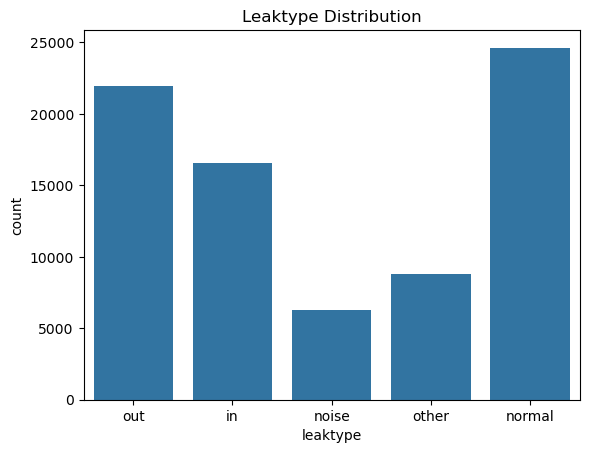

In [15]:
# 타깃 분포 시각화
sns.countplot(x='leaktype', data=df)
plt.title("Leaktype Distribution")
plt.show()

In [16]:
# 주파수 특성 기초 통계
print(df_freq.describe().T.head(10))

# 결측치 확인
print("결측치 수:\n", df.isnull().sum().sum())

        count       mean        std  min  25%  50%  75%     max
0HZ   78204.0   0.000000   0.000000  0.0  0.0  0.0  0.0     0.0
10HZ  78204.0   5.286750   5.669245  0.0  3.0  4.0  5.0    86.0
20HZ  78204.0   5.563462   6.292279  0.0  3.0  4.0  5.0   146.0
30HZ  78204.0   5.921705   7.163296  0.0  3.0  4.0  6.0   125.0
40HZ  78204.0   6.318066   8.228361  0.0  3.0  4.0  6.0   218.0
50HZ  78204.0   6.736535   9.395276  0.0  3.0  4.0  6.0   322.0
60HZ  78204.0  11.075393  53.026551  0.0  3.0  4.0  7.0  1221.0
70HZ  78204.0   7.073858   8.643392  0.0  3.0  4.0  7.0   172.0
80HZ  78204.0   7.546698   8.960106  0.0  3.0  5.0  8.0   186.0
90HZ  78204.0   8.482264  11.093485  0.0  4.0  5.0  9.0   438.0
결측치 수:
 0


In [17]:
# 2. 차원축소 전 모델 (원본 feature 사용)
X_train, X_test, y_train, y_test = train_test_split(
    df_freq, df['leaktype_enc'], test_size=0.2, random_state=42, stratify=df['leaktype_enc']
)

In [18]:
model_orig = XGBClassifier()
model_orig.fit(X_train, y_train)
pred_orig = model_orig.predict(X_test)

acc_orig = accuracy_score(y_test, pred_orig)
f1_orig = f1_score(y_test, pred_orig, average="macro")
print("차원축소 전 - Accuracy:", acc_orig, "F1:", f1_orig)

차원축소 전 - Accuracy: 0.906847388274407 F1: 0.8830460726701184


In [19]:
# 3. 차원축소 후 모델 (PCA 적용)
n_components = 100
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_freq)

Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X_pca, df['leaktype_enc'], test_size=0.2, random_state=42, stratify=df['leaktype_enc']
)

In [20]:
model_pca = XGBClassifier()
model_pca.fit(Xp_train, yp_train)
pred_pca = model_pca.predict(Xp_test)

acc_pca = accuracy_score(yp_test, pred_pca)
f1_pca = f1_score(yp_test, pred_pca, average="macro")
print("차원축소 후(PCA) - Accuracy:", acc_pca, "F1:", f1_pca)

차원축소 후(PCA) - Accuracy: 0.911322805447222 F1: 0.889069959782242


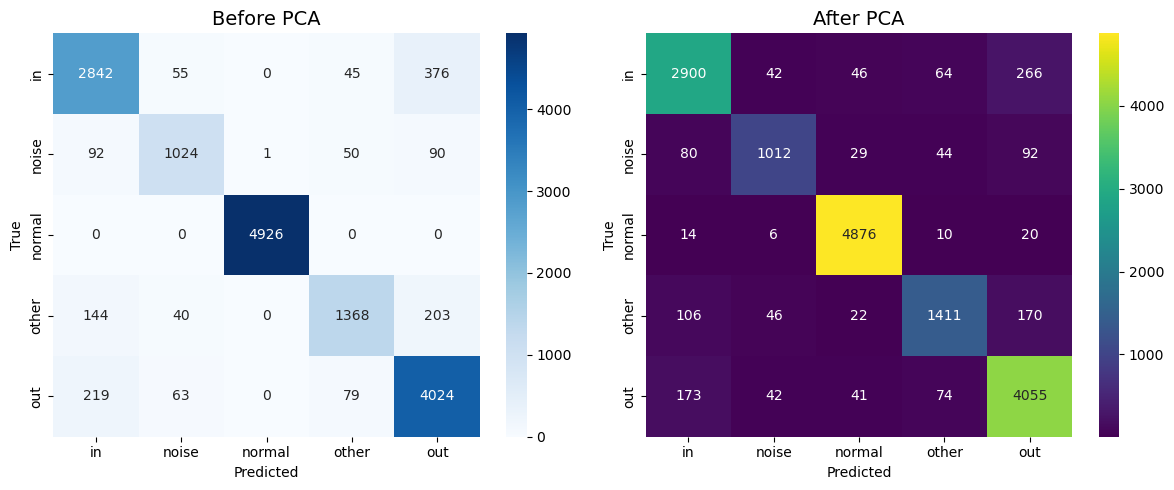

In [23]:
# Confusion Matrix 비교 (차원축소 전 vs 후)
from sklearn.metrics import confusion_matrix


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 차원축소 전
cm_orig = confusion_matrix(y_test, pred_orig)
sns.heatmap(pd.DataFrame(cm_orig, index=le.classes_, columns=le.classes_),
            annot=True, fmt="d", cmap="Blues", ax=axes[0])

axes[0].set_title("Before PCA", fontsize=14)
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# 차원축소 후 (PCA)
cm_pca = confusion_matrix(yp_test, pred_pca)
sns.heatmap(pd.DataFrame(cm_pca, index=le.classes_, columns=le.classes_),
            annot=True, fmt="d", cmap="viridis", ax=axes[1])
axes[1].set_title("After PCA", fontsize=14)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


In [22]:
dff = pd.DataFrame(cm_orig, index=le.classes_, columns=le.classes_)

### 정리  

- **차원이 작을수록** 계산 효율은 좋아지지만,  
  **너무 줄이면 정보 손실**이 커집니다.  

**적정 차원 수(k)는 어떻게 정할까?**  
- 적정 차원 수는 **정보 보존 ↔ 단순화** 사이의 **균형점(trade-off)** 을 찾는 문제
- 일반적으로 **누적 설명된 분산(cumulative explained variance)** 이  
  **90~95% 이상**이면 정보가 충분히 보존된다고 봅니다.  
- 다만, 단순히 설명된 분산만 보고 결정하는 것은 **불충분**합니다.

**왜 설명된 분산만으로는 부족한가?**
- PCA는 **입력 데이터의 분포(구조)** 만 고려하며,  
  실제 예측 목표 **label(정답값)** 과의 관계는 고려하지 않습니다.  
- 따라서 “분산이 크다 = 예측에 유용하다”는 보장이 없습니다.  


**올바른 접근 방법**
1. PCA로 여러 개의 차원 수(k)를 시도합니다.  
2. 각 k별로 모델을 학습합니다.  
3. 검증셋(Validation set)에서 **정확도(Accuracy)**, **ROC-AUC**, **F1-score** 등을 비교합니다.  
4. **과적합이 발생하지 않고 성능이 안정적인 구간**을 선택합니다.

👉 요약
> **PCA의 누적 설명된 분산(90~95%)** 은 좋은 출발점이지만,  
> 최종 차원 수(k)는 반드시 **모델의 실제 검증 성능**을 기준으로 결정해야 합니다.
